In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/kunal/Desktop/Docs_MSIM/Prog_Analytics/Assignments/Final_Project/IBM_HR_data.csv', delimiter=',', encoding='UTF-8')
ad_df = pd.read_csv('C:/Users/kunal/Desktop/Docs_MSIM/Prog_Analytics/Assignments/Final_Project/adult.csv', delimiter=',', header = None, encoding='UTF-8')
ad_df.columns = ['Age', 'JobType', 'EmpID',
                      'EducationLevel', 'Level', 'MaritalStatus',
                      'JobPosition', 'MaritalStatus_Desc', 'Race',
                      'Gender', 'Column_1', 'Column_2',
                      'Column_3', 'Location', 'ExpectedSalary']
ad_df_age = ad_df[['Age', 'JobType', 'EducationLevel', 'Level', 'JobPosition', 'MaritalStatus', 'Location', 'Gender', 'ExpectedSalary']].sort_values(by='Age', ascending=True)
ad_df_age

,Age,JobType,EducationLevel,Level,JobPosition,MaritalStatus,Location,Gender,ExpectedSalary
12318,17,Private,11th,7,Sales,Never-married,United-States,Female,<=50K
6312,17,Private,11th,7,Sales,Never-married,United-States,Male,<=50K
30927,17,Private,11th,7,Other-service,Never-married,United-States,Male,<=50K
12787,17,Local-gov,11th,7,Adm-clerical,Never-married,United-States,Female,<=50K
25755,17,?,11th,7,?,Never-married,United-States,Male,<=50K
...,...,...,...,...,...,...,...,...,...
24043,90,Self-emp-not-inc,HS-grad,9,Exec-managerial,Never-married,United-States,Male,<=50K
32277,90,Private,HS-grad,9,Adm-clerical,Widowed,United-States,Female,<=50K
5104,90,Private,Some-college,10,Other-service,Never-married,United-States,Male,<=50K
8963,90,?,HS-grad,9,?,Widowed,United-States,Female,<=50K


In [41]:
ad_df_age.dtypes
ad_df_age_private = pd.DataFrame({'Count': ad_df_age.groupby(by='JobType')['JobType'].count()})
ad_df_age_private

,Count
JobType,
?,1836
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1298
Without-pay,14


In [36]:
ad_df_age.dtypes
ad_df_age['JobType'] = ad_df_age['JobType'].str.strip()
ad_df_age['Location'] = ad_df_age['Location'].str.strip()
ad_df_age['Gender'] = ad_df_age['Gender'].str.strip()
ad_df_private = ad_df_age[ad_df_age['JobType'] == 'Private']
ad_df_private_US = ad_df_private[ad_df_private['Location'] == 'United-States']
ad_df_private_US = ad_df_private_US[ad_df_private_US['Age'] <= 60]
ad_df_private_US

,Age,JobType,EducationLevel,Level,JobPosition,MaritalStatus,Location,Gender,ExpectedSalary
12318,17,Private,11th,7,Sales,Never-married,United-States,Female,<=50K
6312,17,Private,11th,7,Sales,Never-married,United-States,Male,<=50K
30927,17,Private,11th,7,Other-service,Never-married,United-States,Male,<=50K
14475,17,Private,11th,7,Sales,Never-married,United-States,Female,<=50K
23394,17,Private,10th,6,Other-service,Never-married,United-States,Female,<=50K
...,...,...,...,...,...,...,...,...,...
21761,60,Private,HS-grad,9,Protective-serv,Divorced,United-States,Male,<=50K
27607,60,Private,9th,5,Machine-op-inspct,Married-civ-spouse,United-States,Male,<=50K
8179,60,Private,7th-8th,4,Other-service,Divorced,United-States,Male,<=50K
13035,60,Private,12th,8,Adm-clerical,Married-civ-spouse,United-States,Male,<=50K


In [4]:
df_attrition_count = pd.DataFrame({'Count': df.groupby(by='Attrition')['Attrition'].count()})
df_attrition_count

,Count
Attrition,
No,1233
Yes,237


In [5]:
df_attrition_count_g = pd.DataFrame({'Count': df.groupby(by='Gender')['Gender'].count()})
df_attrition_count_g

,Count
Gender,
Female,588
Male,882


In [7]:
df_attrition_m = df[df['Gender'] == 'Male']
df_attrition_f = df[df['Gender'] == 'Female']
df_attrition_m_count = pd.DataFrame({'Count': df_attrition_m.groupby(by='Attrition')['Attrition'].count()})
df_attrition_m_count

,Count
Attrition,
No,732
Yes,150


In [8]:
df_attrition_f_count = pd.DataFrame({'Count': df_attrition_f.groupby(by='Attrition')['Attrition'].count()})
df_attrition_f_count

,Count
Attrition,
No,501
Yes,87


In [12]:
df_attrition_m_age = pd.DataFrame({'Count': df_attrition_m.groupby(by='Age')['Age'].count()})
df_attrition_m_age

,Count
Age,
18,4
19,5
20,5
21,7
22,11
23,13
24,15
25,20
26,25


In [10]:
df_attrition_f_age = pd.DataFrame({'Count': df_attrition_f.groupby(by='Age')['Age'].count()})
df_attrition_f_age

,Count
Age,
18,4
19,4
20,6
21,6
22,5
23,1
24,11
25,6
26,14


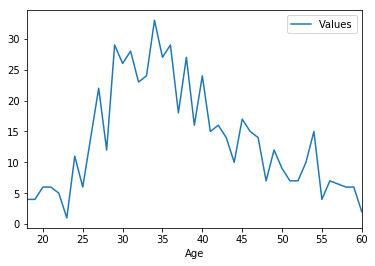

In [20]:
from pandas import DataFrame
   
Data = {'Age': df_attrition_f.groupby(by='Age')['Age'].mean(),
        'Values': df_attrition_f.groupby(by='Age')['Age'].count()
       }
  
df_plot = DataFrame(Data,columns=['Age','Values'])
df_new = df_plot.plot(x ='Age', y='Values', kind = 'line')
df_new

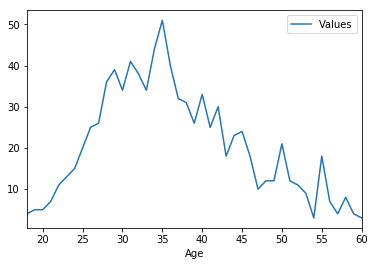

In [25]:
Data_m = {'Age': df_attrition_m.groupby(by='Age')['Age'].mean(),
        'Values': df_attrition_m.groupby(by='Age')['Age'].count()
       }
  
df_plot_m = DataFrame(Data_m,columns=['Age','Values'])
df_new_m = df_plot_m.plot(x ='Age', y='Values', kind = 'line')
df_new_m

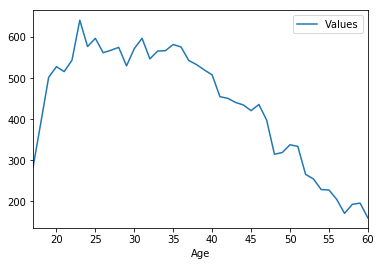

In [31]:
ad_df_private_ct = DataFrame({'Count': ad_df_private_US.groupby(by='Age')['Age'].count()})
ad_df_private_ct
ad_data = {'Age': ad_df_private_US.groupby(by='Age')['Age'].mean(),
        'Values': ad_df_private_US.groupby(by='Age')['Age'].count()
      }
  
ad_plot = DataFrame(ad_data,columns=['Age','Values'])
ad_plot_new = ad_plot.plot(x ='Age', y='Values', kind = 'line')
ad_plot_new

In [37]:
ad_df_attrition_m = ad_df_private_US[ad_df_private_US['Gender'] == 'Male']
ad_df_attrition_m

,Age,JobType,EducationLevel,Level,JobPosition,MaritalStatus,Location,Gender,ExpectedSalary
6312,17,Private,11th,7,Sales,Never-married,United-States,Male,<=50K
30927,17,Private,11th,7,Other-service,Never-married,United-States,Male,<=50K
28770,17,Private,7th-8th,4,Sales,Never-married,United-States,Male,<=50K
24861,17,Private,10th,6,Other-service,Never-married,United-States,Male,<=50K
28754,17,Private,11th,7,Handlers-cleaners,Never-married,United-States,Male,<=50K
...,...,...,...,...,...,...,...,...,...
5362,60,Private,HS-grad,9,Craft-repair,Married-civ-spouse,United-States,Male,<=50K
21761,60,Private,HS-grad,9,Protective-serv,Divorced,United-States,Male,<=50K
27607,60,Private,9th,5,Machine-op-inspct,Married-civ-spouse,United-States,Male,<=50K
8179,60,Private,7th-8th,4,Other-service,Divorced,United-States,Male,<=50K


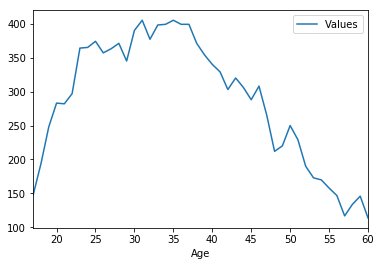

In [38]:
ad_df_attrition_m = ad_df_private_US[ad_df_private_US['Gender'] == 'Male']
ad_df_attrition_f = ad_df_private_US[ad_df_private_US['Gender'] == 'Female']

ad_df_private_m = DataFrame({'Count': ad_df_attrition_m.groupby(by='Age')['Age'].count()})
ad_df_private_m
ad_data_m = {'Age': ad_df_attrition_m.groupby(by='Age')['Age'].mean(),
        'Values': ad_df_attrition_m.groupby(by='Age')['Age'].count()
      }
  
ad_plot_m = DataFrame(ad_data_m,columns=['Age','Values'])
ad_plot_new_m = ad_plot_m.plot(x ='Age', y='Values', kind = 'line')
ad_plot_new_m

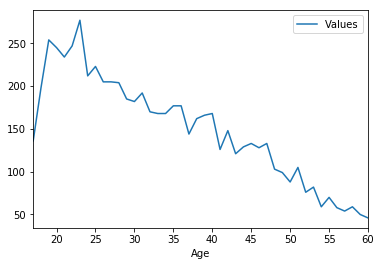

In [39]:
ad_df_private_f = DataFrame({'Count': ad_df_attrition_f.groupby(by='Age')['Age'].count()})
ad_df_private_f
ad_data_f = {'Age': ad_df_attrition_f.groupby(by='Age')['Age'].mean(),
        'Values': ad_df_attrition_f.groupby(by='Age')['Age'].count()
      }
  
ad_plot_f = DataFrame(ad_data_f,columns=['Age','Values'])
ad_plot_new_f = ad_plot_f.plot(x ='Age', y='Values', kind = 'line')
ad_plot_new_f